In [1]:
import numpy
import scipy
import matplotlib
import pandas
import PIL
import tifffile

In [2]:
import tifffile

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import numpy as np
import scipy.ndimage as ndi

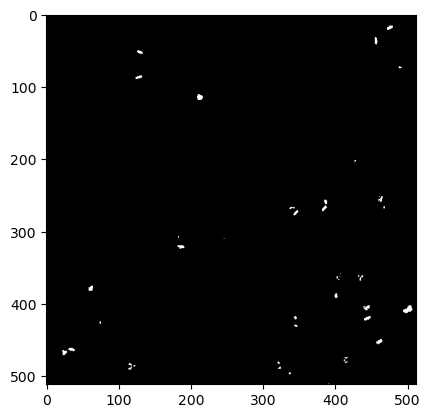

In [19]:
img = tifffile.imread('image1.tif')
mask = img>128
plt.imshow(mask,cmap ='gray')

In [20]:
labels,nimage1=ndi.label(mask)
nimage1

47

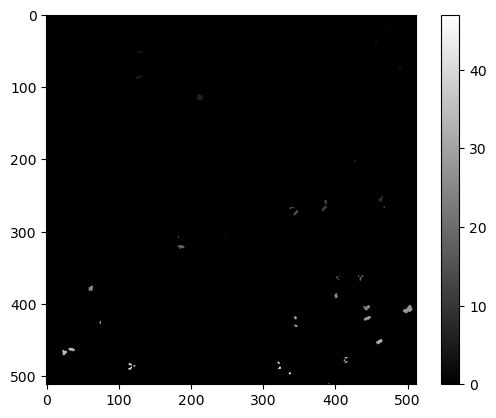

In [24]:
plt.imshow(labels,cmap='gray')
plt.colorbar()

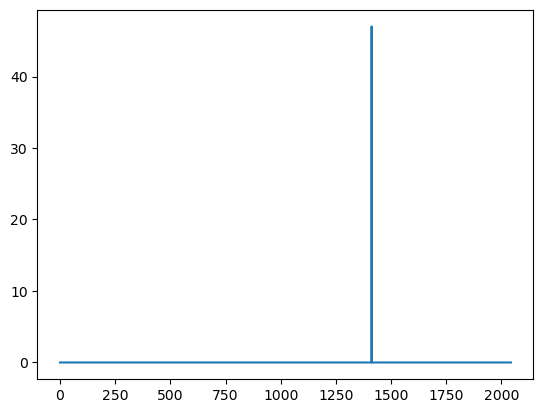

In [27]:
edgearray=list(labels[0,:-1])+list(labels[:-1,-1])+list(labels[-1,1:])+list(labels[1:,0])
plt.plot(edgearray)

In [28]:
edgelabels=np.unique(edgearray)
edgelabels

array([ 0, 47], dtype=int32)

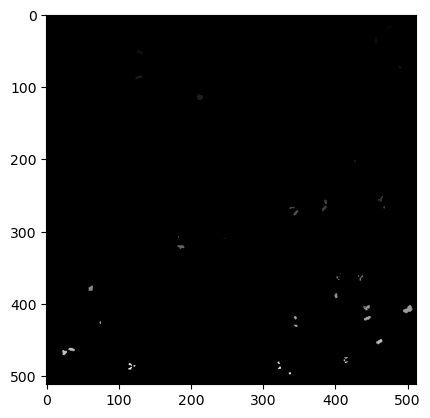

In [29]:
filtered=labels.copy()
for idx in edgelabels[1:]:
    filtered[labels==idx]=0.0
plt.imshow(filtered,cmap='gray')

In [30]:
filtered,filtblobs=ndi.label(filtered>0)
filtblobs

46

In [31]:
labelsums=ndi.sum(img,filtered,range(1,filtblobs+1))

In [32]:
labelsums

array([ 6767.,  6180.,  4254.,  1258.,  4641.,  7797.,   590.,   154.,
         143.,  3703.,  3264.,  4824.,   838.,  2091.,  4094.,   394.,
         130.,  4798.,   141.,   563.,  2234.,   820.,   133.,   283.,
        4852.,  3286.,  5828., 13924.,  2119.,  6240.,   799.,  1495.,
        6512.,  4222.,  4669.,   929.,   585.,   131.,  1096.,   734.,
         130.,  1590.,   703.,  1690.,  1299.,   941.])

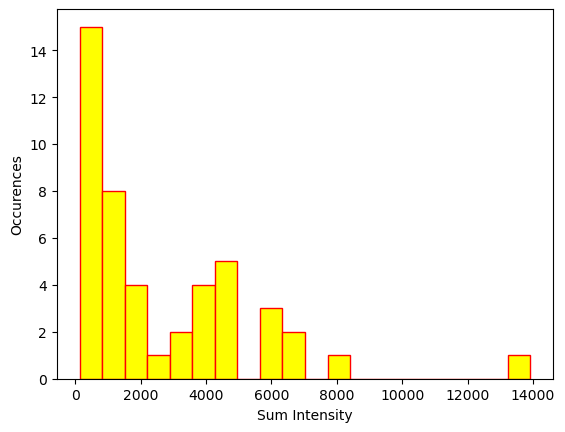

In [58]:
plt.hist(labelsums,bins=20,color='yellow',edgecolor='red')
plt.xlabel('Sum Intensity')
plt.ylabel('Occurences')
plt.show()

In [34]:
labelavgs=ndi.mean(img,filtered,range(1,filtblobs+1))

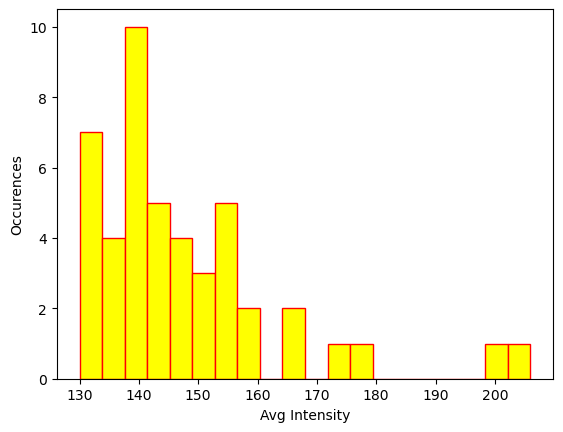

In [59]:
plt.hist(labelavgs,bins=20,color = 'yellow',edgecolor='red')
plt.xlabel('Avg Intensity')
plt.ylabel('Occurences')
plt.show()

In [38]:
labelareas=ndi.sum(np.ones(img.shape),filtered,range(1,filtblobs+1))

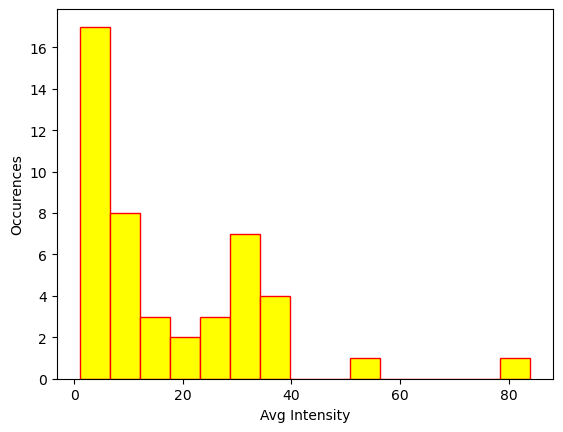

In [60]:
plt.hist(labelareas,bins=15,color='yellow',edgecolor='red')
plt.xlabel('Avg Intensity')
plt.ylabel('Occurences')
plt.show()

In [40]:
background=ndi.mean(img,labels,[0])[0]
background

np.float64(16.872466529686132)

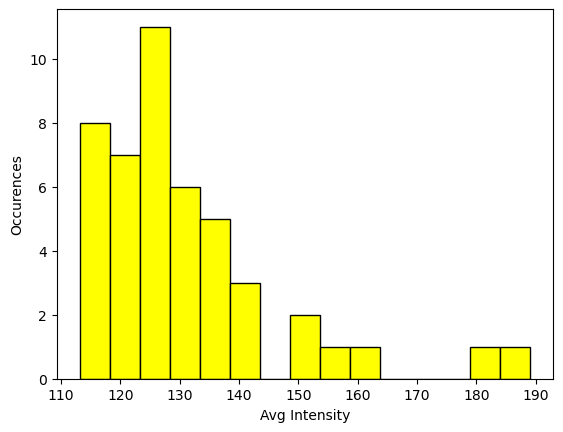

In [61]:
plt.hist(labelavgs-background,bins=15,color= 'yellow', edgecolor='black')
plt.xlabel('Avg Intensity')
plt.ylabel('Occurences')
plt.show()

In [44]:
cellimg=tifffile.imread('image1.tif')

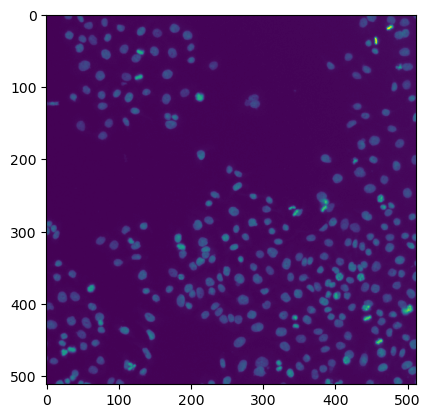

In [45]:
plt.imshow(cellimg)

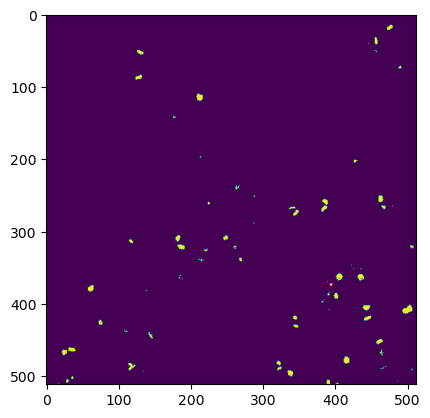

In [55]:
plt.imshow(cellimg[:,:]>100)

In [54]:
cellimg.shape


(512, 512)

In [64]:
celllabels,ncells=ndi.label(cellimg[:,:]>100)
ncells

88

n cells: 88


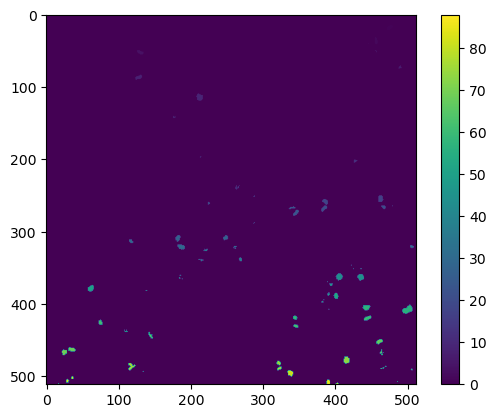

In [70]:
celllabels=ndi.binary_fill_holes(celllabels)
celllabels[celllabels==6]=0.0
celllabels,ncells=ndi.label(celllabels>0)
print('n cells: '+str(ncells))
plt.imshow(celllabels)
plt.colorbar()
plt.show()

In [68]:
cellmeans=[ndi.mean(cellimg[:,:],celllabels,range(1,ncells+1)) for i in range(3)]
cellmeans

[array([188.        , 197.03030303, 101.        , 145.        ,
        103.        , 102.5       , 134.33333333, 142.64285714,
        143.47058824, 103.14285714, 101.33333333, 128.85714286,
        106.2       , 101.        , 109.2       , 105.33333333,
        132.09615385, 133.66666667, 105.22222222, 151.65853659,
        122.45454545, 107.        , 140.36842105, 144.45945946,
        103.        , 101.        , 112.46511628, 111.59375   ,
        110.        , 131.79245283, 104.6       , 107.57142857,
        106.        , 106.5       , 102.        , 106.        ,
        112.375     , 102.66666667, 107.16666667, 101.        ,
        103.        , 105.        , 117.40625   , 121.91666667,
        107.5       , 112.33333333, 105.        , 104.        ,
        107.63636364, 130.81481481, 105.5       , 108.77777778,
        134.94736842, 103.        , 104.5       , 153.98148148,
        140.73684211, 101.        , 133.16      , 162.88636364,
        118.07142857, 123.30434783, 102.

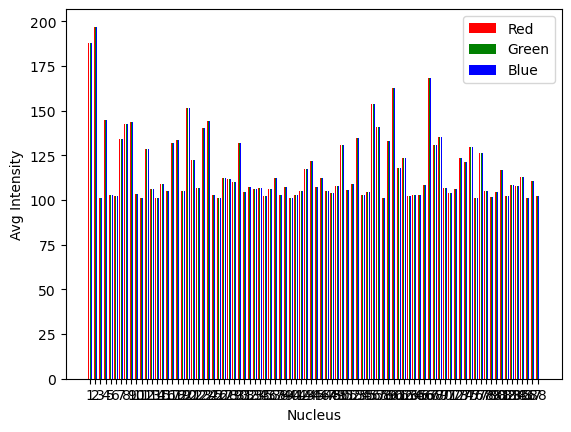

In [69]:
xvals=np.arange(len(cellmeans[0]))+1
plt.bar(xvals-0.25,cellmeans[0],width=0.18,color='Red')
plt.bar(xvals,cellmeans[1],width=0.18,color='Green')
plt.bar(xvals+0.25,cellmeans[2],width=0.18,color='Blue')
plt.xticks(xvals)
plt.legend(['Red','Green','Blue'])
plt.xlabel('Nucleus')
plt.ylabel('Avg Intensity')
plt.show()

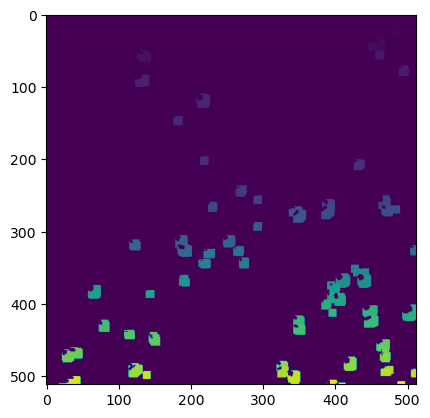

In [71]:
bandthickness=10
bandlabels=celllabels.copy()
for i in range(bandthickness):
    bandlabels=ndi.maximum_filter(bandlabels,size=(2,2))
#now delete the original labels
bandlabels[celllabels>0]=0
plt.imshow(bandlabels)

In [73]:
bandmeans=[ndi.mean(cellimg[:,:],bandlabels,range(1,ncells+1)) for i in range(3)]
bandmeans

[array([30.224     , 18.8040201 , 36.9826087 , 24.812     , 40.26666667,
        17.34615385, 32.87894737, 15.27037037, 18.49310345, 33.58024691,
        22.38571429, 23.06      , 28.45614035, 23.25      , 18.7       ,
        19.43571429, 28.58291457, 40.1484375 , 19.77647059, 26.52592593,
        45.6       , 20.29166667, 28.82575758, 23.79615385, 18.        ,
        22.675     , 31.17837838, 27.3625    , 45.8       , 32.99630996,
        23.8125    , 23.18181818, 41.33333333, 13.82307692, 96.33333333,
        50.63157895, 19.34736842, 76.40625   , 28.79411765, 71.72222222,
        35.75      , 28.61702128, 35.72161172, 29.65357143, 40.78378378,
        34.36666667, 21.5       , 64.25      , 30.42690058, 16.16296296,
        29.44615385, 38.77      , 26.736     , 42.90322581, 51.93877551,
        23.48736462, 27.58943089, 38.75      , 25.69277108, 19.77037037,
        32.45909091, 18.18181818, 59.78571429, 37.14285714, 18.56666667,
        26.91732283, 26.52340426, 16.82777778, 22.7

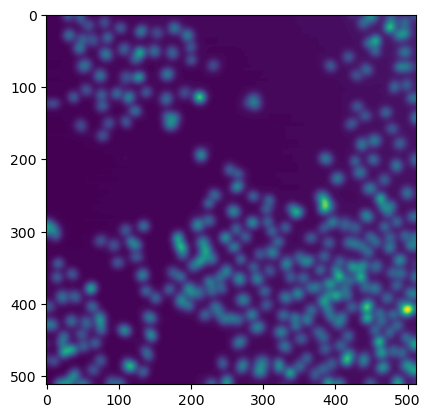

In [74]:
plt.imshow(ndi.gaussian_filter(cellimg[:,:],sigma=5))

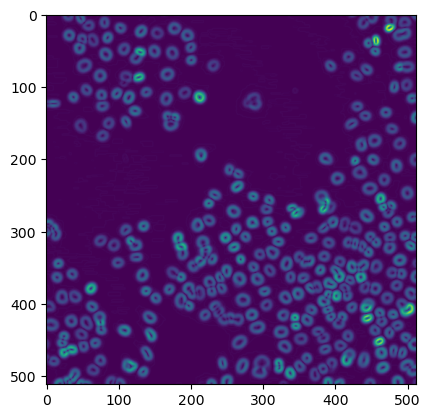

In [76]:
smoothed=ndi.gaussian_filter(cellimg[:,:],sigma=2)
#for some reason sobel only get's calculated correctly in floating point type images
smoothed=smoothed.astype(float)
xgrad=ndi.sobel(smoothed,axis=0)
ygrad=ndi.sobel(smoothed,axis=1)
sobel=np.hypot(xgrad,ygrad).astype(float)
plt.imshow(sobel)